In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # השורה הזאת תדרוש אישור להסתכל על מידע בדרייב, תאשרו

Mounted at /content/gdrive


In [ ]:
#נחזור על המהלכים שעשיתם בתרגיל הראשון
#import and prepare table for analysis
df = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/Bioinformatic data mining and analysis/ex1/skin_and_keyboard_microbiome.csv', sep=',', header=0)
df.set_index('#OTU_ID', inplace=True)
df_taxonomy = df.select_dtypes(include={'object'})
df.drop(columns='taxonomy', inplace=True)
new_column_names = df.columns.map(lambda x: x.split('.')[1])
df.columns = new_column_names
df_ra = df.truediv(df.sum(axis=0), axis=1)
df_ra

,M2Ikey217,M2Bkey217,M2Ckey217,M2Dkey217,M2Midr217,M2Nkey217,M2Pinr217,M2Skey217,M2Tkey217,M3Lkey217,...,M9Fkey217,M9Kkey217,M9Pkey217,R1Space217,U2Space217,M3Akey217,M10Space217,M11Space217,M3Indr217,M3Kkey217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.00066,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.00000,0.001457,0.000864,0.00303,0.000797,0.002155,0.001692,0.000704,0.002185,0.000756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286945,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279699,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221284,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950496,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634029,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#נייבא את הקובץ מטהדאטא
df_sample_data = pd.read_table('/content/gdrive/MyDrive/Colab Notebooks/Bioinformatic data mining and analysis/ex2/Sample_data.csv', sep=',', header=0)
# נוריד שורות ריקות במקרה שיש
df_sample_data.dropna(axis=0, inplace=True)
df_sample_data


,Sample Number,Sample ID,Sample Type,No. of sequences,Study
0,1.0,14SK2001,"20degC, day 14",2201.0,storage
1,2.0,14SK2002,"20degC, day 14",1943.0,storage
2,3.0,14SK2003,"20degC, day 14",2389.0,storage
3,4.0,14SK201,"-20degC, day 14",2215.0,storage
4,5.0,14SK202,"-20degC, day 14",2279.0,storage
...,...,...,...,...,...
407,408.0,M9Ykey217,key,821.0,keyboard
408,409.0,R1Space217,key,954.0,keyboard
409,410.0,U1Space217,key,448.0,keyboard
410,411.0,U2Space217,key,701.0,keyboard


In [ ]:
#נתרכז בניסוי הראשון המכונה
#'keyboard'
# אז נסנן את טבלת הנתונים שתכיל רק את דוגמאות הרלוונטיות

keyboard_sample_ids = df_sample_data[df_sample_data['Study']=='keyboard']['Sample ID']
df_keyboard = df_ra.loc[:, keyboard_sample_ids]
print(df_keyboard.shape)
df_keyboard

(2495, 115)


,F10Space217,F11Space217,F12Space217,L1Space217,L3Space217,M10Space217,M11Space217,M2Akey217,M2Bkey217,M2Ckey217,...,M9Thml217,M9Thmr217,M9Vkey217,M9Wkey217,M9Xkey217,M9Ykey217,R1Space217,U1Space217,U2Space217,U3Space217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1050608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001457,0.000864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003534
286945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
279699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2221284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1950496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1634029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
#עדיין יש דוגמאות שלא קשורות לניסוי הראשון (שנלקחו מהמקלדת עבור ניסויים אחרים)
# אנחנו מעוניינים בניסויים שהשם שלהם מתחיל באות
# 'M'
df_keyboard = df_keyboard.filter(regex='^M[2,3,9]')


In [ ]:
df_keyboard

,M2Akey217,M2Bkey217,M2Ckey217,M2Dkey217,M2Ekey217,M2Enter217,M2Fkey217,M2Gkey217,M2Hkey217,M2Ikey217,...,M9Rinl217,M9Rinr217,M9Skey217,M9Space217,M9Thml217,M9Thmr217,M9Vkey217,M9Wkey217,M9Xkey217,M9Ykey217
#OTU_ID,,,,,,,,,,,,,,,,,,,,,
643311,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050608,0.0,0.001457,0.000864,0.00303,0.000968,0.000000,0.0,0.0,0.000872,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286945,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279699,0.0,0.000000,0.000000,0.00000,0.000000,0.000666,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221284,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876945,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950496,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634029,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


שאלה 3)
מה מסמלות הדוגמאות שמתחילות ב

M2:

M3:

M9:

שאלה 4)
מה הסוגים השונים של הדוגמאות?
היעזרו בתיאורים בטבלת המטאדאטא בטור

'Sample type'
יש דוגמאות
שאלה 5)
מה מסמלות השורות? מה מודדים בתוך הדוגמאות?



לצורך מתן תשובה מיינתי את הנתונים לטבלה חדשה והוצאתי לאקסל:

In [ ]:
df=df_sample_data[df_sample_data['Study']=='keyboard']
df

,Sample Number,Sample ID,Sample Type,No. of sequences,Study
24,25.0,F10Space217,key,855.0,keyboard
25,26.0,F11Space217,key,642.0,keyboard
26,27.0,F12Space217,key,906.0,keyboard
157,158.0,L1Space217,key,207.0,keyboard
158,159.0,L3Space217,key,310.0,keyboard
...,...,...,...,...,...
407,408.0,M9Ykey217,key,821.0,keyboard
408,409.0,R1Space217,key,954.0,keyboard
409,410.0,U1Space217,key,448.0,keyboard
410,411.0,U2Space217,key,701.0,keyboard


In [ ]:
ndf=df.loc[df['Sample ID'].str.contains("^M[2,3,9]")]
ndf

,Sample Number,Sample ID,Sample Type,No. of sequences,Study
191,192.0,M2Akey217,key,1183.0,keyboard
192,193.0,M2Bkey217,key,1301.0,keyboard
193,194.0,M2Ckey217,key,1120.0,keyboard
194,195.0,M2Dkey217,key,951.0,keyboard
195,196.0,M2Ekey217,key,1010.0,keyboard
...,...,...,...,...,...
403,404.0,M9Thmr217,finger,1665.0,keyboard
404,405.0,M9Vkey217,key,1485.0,keyboard
405,406.0,M9Wkey217,key,1157.0,keyboard
406,407.0,M9Xkey217,key,960.0,keyboard


In [ ]:
ndf.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Bioinformatic data mining and analysis/ex2/ndf.csv")

3:
הדוגמאות הנ"ל בן דוגמאות של מושבות חיידיקים על אצבעות של 3 אנשים ועל מקלדות המחשב שלהם, כל דוגמא עבור אדם אחד.
4:
הדוגמאות הם מ31 מקשי מחשב ועשרת האצבעות של כל אדם.
5:
בתשובה לשאלה 5 לא הבנתי אם הכוונה לשורות בטבלת המטא דאטה או בטבלה
df_keyboard
לכן אענה על שניהם:
טבלת מטא דאטא:
 השורות מסמלות דגימות שונות של אזורי עור שונים/חלקי מקלדת שונים.
 בכל דוגמא מודדים את כמות וסוג החיידיקיים שנמצאים על האזור/מקום שנמדד (לפי כמות הרצפים שנמצאו בהתאמה לכל חיידק)
 df_keyboard:

השורות מסמלות חיידיקים שונים שנמצאו בכל דוגמא, בכל דוגמר מודדים את סוג וכמות החיידיקים שנמצאו (כנ"ל)



In [ ]:
#על מנת לבצע את האנליזות, צריך להתקין ספריה חדשה
!pip install scikit_bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 32.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 12.2 MB 63.0 MB/s 
     |████████████████████████████████| 4.5 MB 67.5 MB/s 
     |████████████████████████████████| 33.8 MB 298 kB/s 
     |████████████████████████████████| 1.6 MB 79.9 MB/s 
  Created wheel for scikit-bio: filename=scikit_bio-0.5.8-cp38-cp38-linux_x86_64.whl size=2309538 sha256=8859230b8b27b48bb0ae8311be4e1db83f218548dfcf120f30dd3d91f159f0e7
  Stored in directory: /root/.cache/pip/wheels/a5/7a/53/f3c5ab9302db251c01936f8c4b1993a69390b20b4366e40ec9
  Created wheel for hdmedians: filenam

In [ ]:
# לאחר ההתקנה, ניתן לייבא את הפקודות הנדרשות
from skbio.stats.ordination import pcoa as skbio_pca
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# עכשיו מתחיל הקטע המעניין
# אנחנו רוצים לראות את הדוגמאות ואת היחסים ביניהם: אילו דוגמאות דומות זו לזו ואילו שונות זו מזו

שאלה 6) מה ההיפותזה שלך? אילו סוגים של דוגמאות את מצפה שיהיו דומות יותר ואילו פחות

תשובה:
אני חושבת שהדוגמאות של כל אדם מהאצבעות שלו ומהמקלדת שלו אמורות להיות דומות, ואילו דוגמאות מאנשים שונים אמורות להיות שונות.


<Figure size 1440x1080 with 0 Axes>

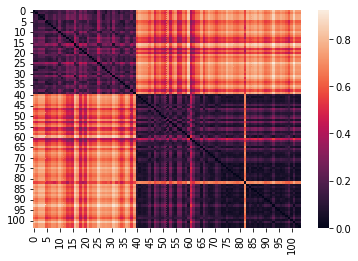

<Figure size 1440x1080 with 0 Axes>

In [ ]:
# על מנת לאשש או להפריך את ההיפותזה, נרצה לראות את הדוגמאות באיזשהו גרף או תמונה
# לשם כך, צריך להתמודד עם הבעיה של הרבה מימדים: בכל דוגמה יש הרבה סוגים של חיידקים
# תחילה, נמדוד את ה"מרחק" בין הדוגמאות

#שאלה 7

#תשתמשו בפונקציה?
distmat = pairwise_distances(df_keyboard.T, metric='euclidean', force_all_finite=True)
# כדי לראות את המרחשים בין כל שתי דוגמאות, תציירו מפת חום של התוצאה בעזרת
sns.heatmap(distmat)
plt.figure(figsize=(20,15))
#sns.heatmap()

In [ ]:
# שאלה 8) מה גודל הטבלה של התוצאה?
#למה
# הקוד שלך כאן
distmat.shape
#גודל הטבלה 104*104 כיוון שבודקים מרחקים בין זוגות של 104 דוגמאות שונות.

(104, 104)

In [ ]:
#בואו נבדוק האם המטריצה שנוצרה סימטרית
(distmat == distmat.T).all()

# האם ציפינו שהמטריצה תהיה סימטרית? תסתכלו על מפת החום, היא נראית סימטרית?
# התשובה היא שכן, ציפינו שהמרחק מדוגמה אחת לשניה תהיה זהה למרחק מהשניה לראשונה


False

In [ ]:
# ננסה פונקציה אחרת שמחשבת מרחקים מספריה אחרת בפייתון
from scipy.spatial.distance import pdist, squareform

In [ ]:
dist = pdist(df_keyboard.T)
# הערך שמוחזר מהפונקציה הוא לא הצורת מטריצה, אלא רשימה ארוכה של מרחקים, אז נשתמש בפונקצית עזר להפוך אותו למטריצה שנוכל לצייר
sq = squareform(dist)
sq

array([[0.        , 0.0822481 , 0.13889341, ..., 0.84163   , 0.73472538,
        0.73736793],
       [0.0822481 , 0.        , 0.1685174 , ..., 0.79423206, 0.68724979,
        0.6897317 ],
       [0.13889341, 0.1685174 , 0.        , ..., 0.862214  , 0.75542427,
        0.75780204],
       ...,
       [0.84163   , 0.79423206, 0.862214  , ..., 0.        , 0.11188008,
        0.11207663],
       [0.73472538, 0.68724979, 0.75542427, ..., 0.11188008, 0.        ,
        0.0325478 ],
       [0.73736793, 0.6897317 , 0.75780204, ..., 0.11207663, 0.0325478 ,
        0.        ]])

<Figure size 1440x1080 with 0 Axes>

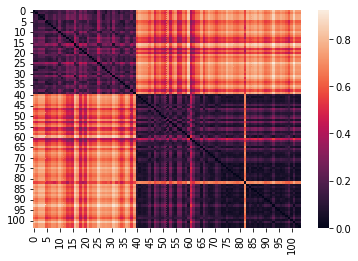

<Figure size 1440x1080 with 0 Axes>

In [ ]:
# שאלה 9
#תציירו עוד פעם את מפת החום
# הקוד שלך פה
sns.heatmap(sq)
plt.figure(figsize=(20,15))

In [ ]:
# שאלה 10
# האם התוצאה סימטרית הפעם?
# הקוד שלך פה
(sq == sq.T).all()
# תשובה:
#כן

True

# עכשיו אפשר לעשות תהליך של הקטנת מימדים על גבי מטריצת המרחקים.
# זה טיפה שונה ממה שלמדנו בשיעור על
# PCA
# ששם חשיבנו ישירות את ה"מרכיבים" על הנתונים של הדוגמאות עצמם ולא על המרחשים ביניהם.
# בעצם, חישוב מרחקים אאוקלידים וחישוב
# PCOA - princial coordinate analysis
# שקול בדיוק לחישוב
# PCA
# רגיל
# ושיטת ה
#PCOA
# מאפשר לחשב עוד סוגים של מרחקים ולראות איך הדוגמאות נראות במרחב ה"מרכיבים"  בצורות שונות.

In [ ]:
# שאלה 11
# השתמשו ב
# skbio_pca
# כדי לבצע את תהליך הקטנת המימדים
# הקוד שלך פה
pcoa = skbio_pca(sq)
pcoa.samples

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
0,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,0.000002,-0.000613,-0.000075,-0.000006,0.000205,-0.000018,-0.000089,-0.000012,-0.000041,-0.0
1,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000765,-0.000392,-0.000087,0.000157,-0.000033,-0.000001,-0.000159,-0.000043,0.000083,-0.0
2,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000027,0.000057,-0.000114,-0.000024,0.000069,-0.000101,-0.000106,0.000011,-0.000015,-0.0
3,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000200,0.000129,-0.000047,0.000044,-0.000042,-0.000008,-0.000015,-0.000156,-0.000053,-0.0
4,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000149,0.000011,0.000192,-0.000027,-0.000016,0.000076,0.000041,0.000020,0.000006,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,-0.001366,0.000541,0.000222,0.002051,-0.000062,0.001715,0.000167,-0.000712,-0.000530,-0.0
100,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.000362,0.004396,-0.001955,-0.000247,-0.002148,-0.003851,0.001260,-0.000726,-0.000702,-0.0
101,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.000598,0.000907,-0.001446,0.000569,0.000268,0.001322,-0.001269,0.005128,-0.003028,-0.0
102,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,0.001243,-0.004479,-0.000208,0.002226,-0.002178,-0.002180,0.000994,-0.000182,-0.000910,-0.0


In [ ]:
#דרך אחרת ל
#pcao
#איתה נמשיך לעבוד
from  skbio.stats.distance import DistanceMatrix
dist = pdist(df_keyboard.T)
sq = squareform(dist)
pcoa = skbio_pca(DistanceMatrix(sq, df_keyboard.T.index))
pcoa.samples


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
M2Akey217,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,0.000002,-0.000613,-0.000075,-0.000006,0.000205,-0.000018,-0.000089,-0.000012,-0.000041,-0.0
M2Bkey217,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000765,-0.000392,-0.000087,0.000157,-0.000033,-0.000001,-0.000159,-0.000043,0.000083,-0.0
M2Ckey217,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000027,0.000057,-0.000114,-0.000024,0.000069,-0.000101,-0.000106,0.000011,-0.000015,-0.0
M2Dkey217,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000200,0.000129,-0.000047,0.000044,-0.000042,-0.000008,-0.000015,-0.000156,-0.000053,-0.0
M2Ekey217,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000149,0.000011,0.000192,-0.000027,-0.000016,0.000076,0.000041,0.000020,0.000006,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9Thmr217,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,-0.001366,0.000541,0.000222,0.002051,-0.000062,0.001715,0.000167,-0.000712,-0.000530,-0.0
M9Vkey217,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.000362,0.004396,-0.001955,-0.000247,-0.002148,-0.003851,0.001260,-0.000726,-0.000702,-0.0
M9Wkey217,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.000598,0.000907,-0.001446,0.000569,0.000268,0.001322,-0.001269,0.005128,-0.003028,-0.0
M9Xkey217,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,0.001243,-0.004479,-0.000208,0.002226,-0.002178,-0.002180,0.000994,-0.000182,-0.000910,-0.0


PC1      0.905973
PC2      0.035499
PC3      0.018225
PC4      0.008631
PC5      0.005966
           ...   
PC100    0.000006
PC101    0.000005
PC102    0.000004
PC103    0.000004
PC104    0.000000
Length: 104, dtype: float64


<BarContainer object of 104 artists>

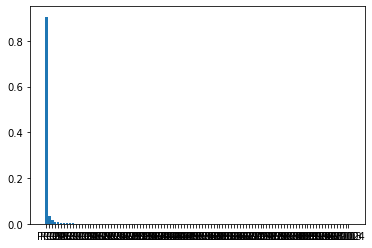

In [ ]:
# שאלה 12
# כמה שונות מוסברת על ידי כל מרכיב
# (component)
var=pcoa.proportion_explained
print(var)
#תציירו גרף המראה את התשובה בעזרת
x=var.index
y=var.values
plt.bar(x,y)



<BarContainer object of 10 artists>

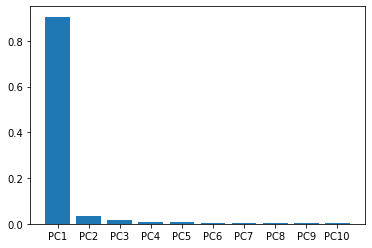

In [ ]:
#כיוון שהגרף לעיל מאוד לא ברור אני מציירת שוב רק את תחילת הגרף כיוון שרואים שמרכיבים אלו מכילים את רוב השונות
plt.bar(x[0:10],y[0:10])

יש כמה אפשרויות לצייר את הדוגמאות במרחב ה

PC1 x PC2

נראה שתי דרכים:



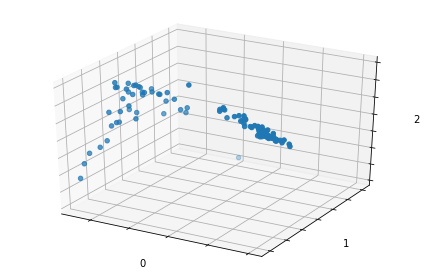

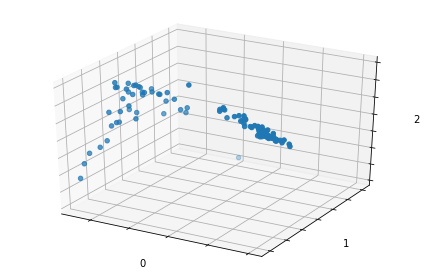

In [ ]:
# אפשר לצייר כך, אבל זה לא אומר הרבה כי כל הדוגמאות האותו צבע וקשה להבחין בשייכות הדוגמאות לקבוצות
#pcoa.plot(df_sample_data_for_plot) #הריצו
pcoa.plot()

In [ ]:
#פונקציה שכתבתי עבור הוספת העמודה
#volunteer
def vol_col(sample_id):
  vol=[]
  for i in sample_id:
    vol.append(i[0:2])
  return vol


In [ ]:
id=ndf['Sample ID']
v=vol_col(id)
print(v)

['M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M3', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9', 'M9']


In [ ]:
# שאלה 13
# נוסיף צבע לדוגמאות על פי מפתח שניקח מקובץ המטהדאטא
# למשל, אם היינו רוצים לשעת אילו דוגמאות הגיעו מכל אחד מ-3 האנשים שהשתתפו במחקר, נוכל ליצור טור המציין את נאיפורמציה הזו ולצייר יחד איתו את הגרף
# נא ליצור טור חדש בשם
# volunteer
# אשר מציין אם הדוגמה מגיעה ממתנדב
# M2, M3 or M9
# הצעה: השתמשו בפונקצית
# apply
# על ה-
# Sample ID
df_sample_data_for_plot=df_sample_data.set_index('Sample ID')
df_sample_data_for_plot=df_sample_data_for_plot.loc[df_keyboard.columns]
df_sample_data_for_plot
df_sample_data_for_plot['volunteer'] =v
df_sample_data_for_plot



,Sample Number,Sample Type,No. of sequences,Study,volunteer
M2Akey217,192.0,key,1183.0,keyboard,M2
M2Bkey217,193.0,key,1301.0,keyboard,M2
M2Ckey217,194.0,key,1120.0,keyboard,M2
M2Dkey217,195.0,key,951.0,keyboard,M2
M2Ekey217,196.0,key,1010.0,keyboard,M2
...,...,...,...,...,...
M9Thmr217,404.0,finger,1665.0,keyboard,M9
M9Vkey217,405.0,key,1485.0,keyboard,M9
M9Wkey217,406.0,key,1157.0,keyboard,M9
M9Xkey217,407.0,key,960.0,keyboard,M9


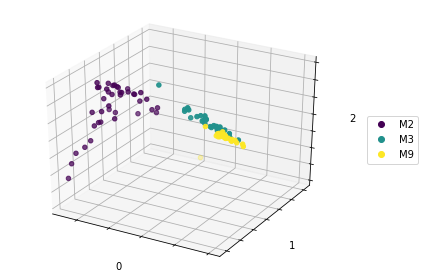

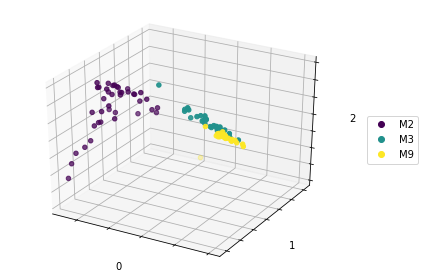

In [ ]:
# שאלה 14
# תוסיפו פה עיבוד לטבלה עד שהיא תתאים לאפשרות להשתמש בה כפרמטר קלט לפונקצית הציור של
# pcoa
# (ראו בקופסה הבאה)
# הצעה: תקראו את הוראות השימוש בפונקציית
# Plot
# של
# pcoa
#הקוד שלכם פה
pcoa.plot(df_sample_data_for_plot,'volunteer')

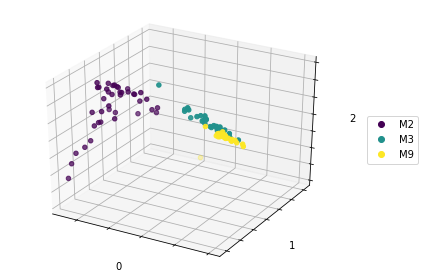

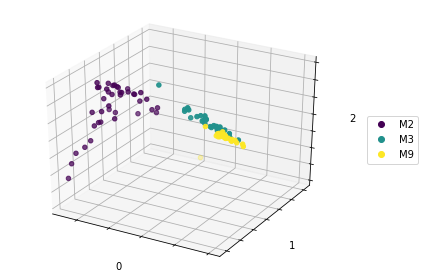

In [ ]:
# עכשיו נצייר עם הצבעים
pcoa.plot(df_sample_data_for_plot, column='volunteer')

In [ ]:
# אפשרות שניה היא להשתמש בתשתית הרגילה של ציור גרפים ולא במשהו מיוחד של
# pcoa
# בשביל זה, נהפוך את התוצאה של הקטנת המימדים ל
# Dataframe:
pcoa_df = pd.DataFrame(pcoa.samples)
pcoa_df.index = df_keyboard.T.index
pcoa_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
M2Akey217,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,0.000002,-0.000613,-0.000075,-0.000006,0.000205,-0.000018,-0.000089,-0.000012,-0.000041,-0.0
M2Bkey217,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000765,-0.000392,-0.000087,0.000157,-0.000033,-0.000001,-0.000159,-0.000043,0.000083,-0.0
M2Ckey217,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000027,0.000057,-0.000114,-0.000024,0.000069,-0.000101,-0.000106,0.000011,-0.000015,-0.0
M2Dkey217,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000200,0.000129,-0.000047,0.000044,-0.000042,-0.000008,-0.000015,-0.000156,-0.000053,-0.0
M2Ekey217,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000149,0.000011,0.000192,-0.000027,-0.000016,0.000076,0.000041,0.000020,0.000006,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9Thmr217,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,-0.001366,0.000541,0.000222,0.002051,-0.000062,0.001715,0.000167,-0.000712,-0.000530,-0.0
M9Vkey217,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.000362,0.004396,-0.001955,-0.000247,-0.002148,-0.003851,0.001260,-0.000726,-0.000702,-0.0
M9Wkey217,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.000598,0.000907,-0.001446,0.000569,0.000268,0.001322,-0.001269,0.005128,-0.003028,-0.0
M9Xkey217,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,0.001243,-0.004479,-0.000208,0.002226,-0.002178,-0.002180,0.000994,-0.000182,-0.000910,-0.0


In [ ]:
# נוסיף לאותה טבלה את המטהדאטא
pcoa_df_merged = pcoa_df.merge(df_sample_data_for_plot, left_index=True, right_index=True, how='inner')
pcoa_df_merged


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC100,PC101,PC102,PC103,PC104,Sample Number,Sample Type,No. of sequences,Study,volunteer
M2Akey217,-0.438641,-0.001313,0.018908,-0.027349,0.046614,0.025241,-0.017812,-0.001869,0.010940,-0.009181,...,-0.000018,-0.000089,-0.000012,-0.000041,-0.0,192.0,key,1183.0,keyboard,M2
M2Bkey217,-0.388765,0.000824,0.035568,-0.045156,0.064926,0.012657,-0.000031,-0.006042,-0.002484,-0.000911,...,-0.000001,-0.000159,-0.000043,0.000083,-0.0,193.0,key,1301.0,keyboard,M2
M2Ckey217,-0.454399,-0.014368,0.053457,-0.004359,-0.069527,0.048196,-0.012013,-0.024410,0.008281,-0.007934,...,-0.000101,-0.000106,0.000011,-0.000015,-0.0,194.0,key,1120.0,keyboard,M2
M2Dkey217,-0.457671,-0.019555,0.053581,-0.009263,-0.064962,0.049149,-0.015674,-0.018137,0.012727,0.003399,...,-0.000008,-0.000015,-0.000156,-0.000053,-0.0,195.0,key,951.0,keyboard,M2
M2Ekey217,-0.457894,-0.021785,0.067852,-0.011062,-0.074264,0.049858,-0.007469,-0.023643,0.008596,0.000643,...,0.000076,0.000041,0.000020,0.000006,-0.0,196.0,key,1010.0,keyboard,M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M9Thmr217,0.169484,0.003359,0.001639,-0.026565,-0.007844,-0.009815,0.021316,0.007878,-0.006030,0.024212,...,0.001715,0.000167,-0.000712,-0.000530,-0.0,404.0,finger,1665.0,keyboard,M9
M9Vkey217,0.276878,0.017503,-0.024520,-0.018523,-0.005956,0.006611,0.005183,0.002569,0.001282,0.000993,...,-0.003851,0.001260,-0.000726,-0.000702,-0.0,405.0,key,1485.0,keyboard,M9
M9Wkey217,0.399001,-0.007007,-0.027287,-0.021254,-0.001867,0.011073,0.002128,0.000726,0.000034,-0.004076,...,0.001322,-0.001269,0.005128,-0.003028,-0.0,406.0,key,1157.0,keyboard,M9
M9Xkey217,0.291359,-0.000822,-0.014541,-0.023313,-0.004639,0.003167,0.007102,0.006712,-0.000412,0.004769,...,-0.002180,0.000994,-0.000182,-0.000910,-0.0,407.0,key,960.0,keyboard,M9


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


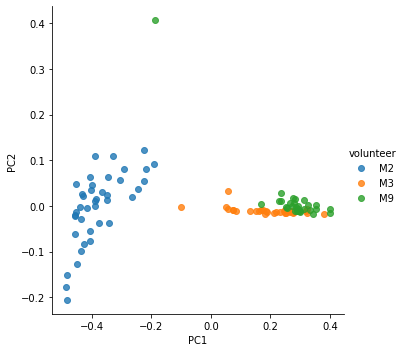

In [ ]:
# נשתמש בפונקצית ציור מיוחדת של הספריה
# seaborn
sns.lmplot('PC1', 'PC2', data=pcoa_df_merged, hue='volunteer', legend=True, fit_reg=False)

שאלה 15
מה המסקנה העיקרית מההסתכלות על הגרף שנוצר?
שאכן, דגימות שמקורם מאותו אדם/מעצמים שהוא נגע בהם דומות בהרכב החיידקים, ושונות מדגימות של אדם אחר.



PC1      0.572561
PC2      0.093235
PC3      0.047283
PC4      0.041642
PC5      0.021997
           ...   
PC100    0.000000
PC101    0.000000
PC102    0.000000
PC103    0.000000
PC104    0.000000
Length: 104, dtype: float64


/usr/local/lib/python3.8/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.054604356523352486 and the largest is 12.273945149772377.
  warn(


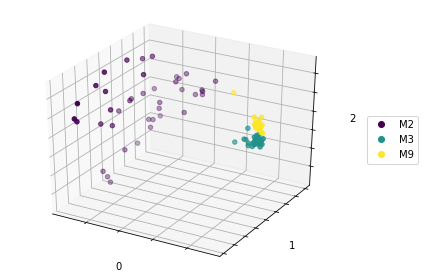

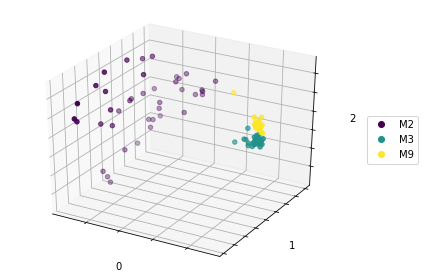

In [ ]:
#אפשר לבצע את כל התהליך על סמך מדידה אחרת של מרחק בין דוגמאות.
# למשל, מדידת המרחק האקולוגי שנקרא
# bray-curtis
# הריצו


dist = pdist(df_keyboard.T, metric='braycurtis')
sq = squareform(dist)
pcoa = skbio_pca(DistanceMatrix(sq, df_keyboard.T.index))
#pcoa = skbio_pca(sq)
var2=pcoa.proportion_explained
print(var2)
pcoa.plot(df_sample_data_for_plot, column='volunteer')


<BarContainer object of 104 artists>

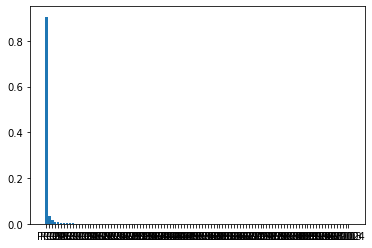

In [ ]:
x=var.index
y=var.values
plt.bar(x,y)


<BarContainer object of 104 artists>

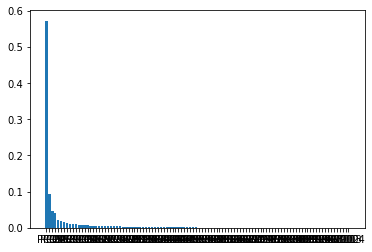

In [ ]:
x2=var2.index
y2=var2.values
plt.bar(x2,y2)


שאלה 16

מה המסקנה מההרצה הזו?
בתשובה, תתייחסו לכמות השונות המוסברת על ידי המרכיבים וגם לאיך שהדוגמאות
נראות בגרף

תשובה:
נראה כי מדידת המרחקים האוקלידית היתה מוצלחת יותר, גם רואים כי השונות מתפזרת ע"פ פחות מרכיבים, וגם הפרדה לקבוצות בגרף ברורה יותר.